In [6]:
import datagenerator
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from librosa.core.spectrum import  util
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
n_mfcc = 15
sr = 16000
n_win = 24
n_hop = 1

In [3]:
files = np.array(os.listdir('../data_denis'))

NameError: name 'np' is not defined

In [9]:
dg = datagenerator.DataGenerator(1,24,16000)
features = np.zeros([0,24,15])
target = np.zeros([0])
sscaler = StandardScaler()
for name in files[:-1]:
    mfccs = datagenerator._from_denis('../data_denis/'+name)
    mfccs = sscaler.fit_transform(mfccs)
    mfccs_frame = util.frame(mfccs, frame_length=n_win, hop_length=n_hop, axis =0)
    features = np.append(features,mfccs_frame, axis=0)
    target = np.append(target, dg._get_target('../data/marks/'+name[:-4]+'__mark.txt', mfccs_frame.shape[0]*512+26*512))
    print(name, target.shape[0]== features.shape[0], features.shape, target.shape)
features_f = np.array([x.flatten() for x in features])

chips.txt True (1938, 24, 15) (1938,)
clear.TXT True (3882, 24, 15) (3882,)
clear_1.txt True (4799, 24, 15) (4799,)
fast.txt True (6724, 24, 15) (6724,)
music.txt True (10379, 24, 15) (10379,)
speak.txt True (12957, 24, 15) (12957,)


In [8]:
test = np.zeros([0,24,15])
target_test = np.zeros([0])
for name in files[-1:]:
    print(name)
    mfccs = datagenerator._from_denis('../data_denis/'+name)
    mfccs = sscaler.transform(mfccs)
    mfccs_frame = util.frame(mfccs, frame_length=n_win, hop_length=n_hop, axis =0)
    test = np.append(test,mfccs_frame, axis=0)
    target_test = np.append(target_test, dg._get_target('../data/marks/'+name[:-4]+'__mark.txt', mfccs_frame.shape[0]*512+26*512))
test_f = np.array([x.flatten() for x in test])

sport.txt


NameError: name 'sscaler' is not defined

In [56]:
param = {'n_neighbors': range(1,3), 'metric':['chebyshev']}
knn = GridSearchCV(KNeighborsClassifier(), param, scoring='f1')
knn.fit(features_f, target)
prediction = knn.predict(test_f)
knn.best_params_, knn.best_score_

({'metric': 'chebyshev', 'n_neighbors': 1}, 0.6046036296860624)

In [73]:
np.sum([prediction[i]!=prediction[i+1] for i in range(prediction.shape[0]-1)])

105

In [74]:
np.sum([target_test[i]!=target_test[i+1] for i in range(target_test.shape[0]-1)])

95

In [92]:
5/47

0.10638297872340426

In [63]:
prediction = prediction[:,1]>0.5

In [64]:
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.52      0.66       586
         1.0       0.59      0.93      0.72       438

    accuracy                           0.69      1024
   macro avg       0.75      0.72      0.69      1024
weighted avg       0.77      0.69      0.69      1024



In [111]:
from sklearn.svm import SVC
model_svc = SVC(degree=2,cache_size=1000, kernel= 'rbf')
param_svc = {'C':np.arange(3,40,1)}
clf_svc = GridSearchCV(model_svc, param_svc,
                   scoring='f1',
                   refit=False,cv=4, n_jobs=4 )
clf_svc.fit(features_f, target)

GridSearchCV(cv=4, estimator=SVC(cache_size=1000, degree=2), n_jobs=4,
             param_grid={'C': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])},
             refit=False, scoring='f1')

In [113]:
clf_svc.best_score_, clf_svc.best_params_

(0.6181486905670583, {'C': 3})

In [117]:
prediction = SVC(degree=2,cache_size=1000, kernel= 'rbf',C=3).fit(features_f, target).predict(test_f)

In [118]:
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.61      0.71       586
         1.0       0.62      0.85      0.72       438

    accuracy                           0.71      1024
   macro avg       0.73      0.73      0.71      1024
weighted avg       0.75      0.71      0.71      1024



In [23]:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=15)

In [18]:

knn = Pipeline(steps=[('scaler', StandardScaler),
                      ('classifier', KNeighborsClassifier())])

In [12]:
ss = StandardScaler()
ss.fit_transform(x_train[0]).shape

(24, 15)

In [4]:
dg = datagenerator.DataGenerator(1,24,16000)
feat, target = dg._get_data('/Users/slowm/OneDrive/Desktop/new_bront/data/wav/clear.wav', '/Users/slowm/OneDrive/Desktop/new_bront/data/marks/clear__mark.txt', True, True)
den = dg.features_preporation(datagenerator._from_denis('/Users/slowm/OneDrive/Desktop/new_bront/RES (9).txt'),flat=True)
model = KNeighborsClassifier(n_neighbors=3)
datagenerator.model_test(model, den, feat, target)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       224
         1.0       0.94      0.94      0.94       165

    accuracy                           0.95       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.95      0.95      0.95       389

              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       224
         1.0       0.65      0.63      0.64       165

    accuracy                           0.70       389
   macro avg       0.69      0.69      0.69       389
weighted avg       0.70      0.70      0.70       389



In [21]:
import tensorflow as tf

In [68]:
model_NN = Sequential()
#model_NN.add(Flatten())
model_NN.add(Dense(n_mfcc*n_win,keras.activations.relu ))
model_NN.add(Dropout(0.4))
model_NN.add(Dense(120,keras.activations.relu ))
model_NN.add(Dropout(0.4))
model_NN.add(Dense(2,keras.activations.softmax ))
model_NN.compile(loss= keras.losses.categorical_crossentropy,optimizer = keras.optimizers.adam_v2.Adam(),
                 metrics=['acc', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [14]:
new_target = np.array([[x==0, x==1] for x in target])


In [15]:
features_f.shape, new_target.shape

((12957, 360), (12957, 2))

In [78]:
model_NN.fit(features_f,new_target, 64,5 )

Epoch 1/5
203/203 [==============================] - 1s 2ms/step - loss: 0.3096 - acc: 0.8614 - precision_2: 0.8614 - recall_2: 0.8614
Epoch 2/5
203/203 [==============================] - 0s 2ms/step - loss: 0.2868 - acc: 0.8692 - precision_2: 0.8692 - recall_2: 0.8692
Epoch 3/5
203/203 [==============================] - 1s 2ms/step - loss: 0.2732 - acc: 0.8788 - precision_2: 0.8788 - recall_2: 0.8788
Epoch 4/5
203/203 [==============================] - 1s 2ms/step - loss: 0.2675 - acc: 0.8823 - precision_2: 0.8823 - recall_2: 0.8823
Epoch 5/5
203/203 [==============================] - 0s 2ms/step - loss: 0.2458 - acc: 0.8932 - precision_2: 0.8932 - recall_2: 0.8932


In [81]:
prediction = model_NN.predict(test_f)
prediction = prediction[:,1]>0.5
print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.49      0.65       586
         1.0       0.58      0.96      0.73       438

    accuracy                           0.69      1024
   macro avg       0.76      0.72      0.69      1024
weighted avg       0.79      0.69      0.68      1024



In [65]:
prediction.sum(), prediction.shape

(688, (1024,))

In [77]:
52/(1027*512/16000)*60

94.93670886075951

In [48]:
import librosa
x, _ = librosa.load('')

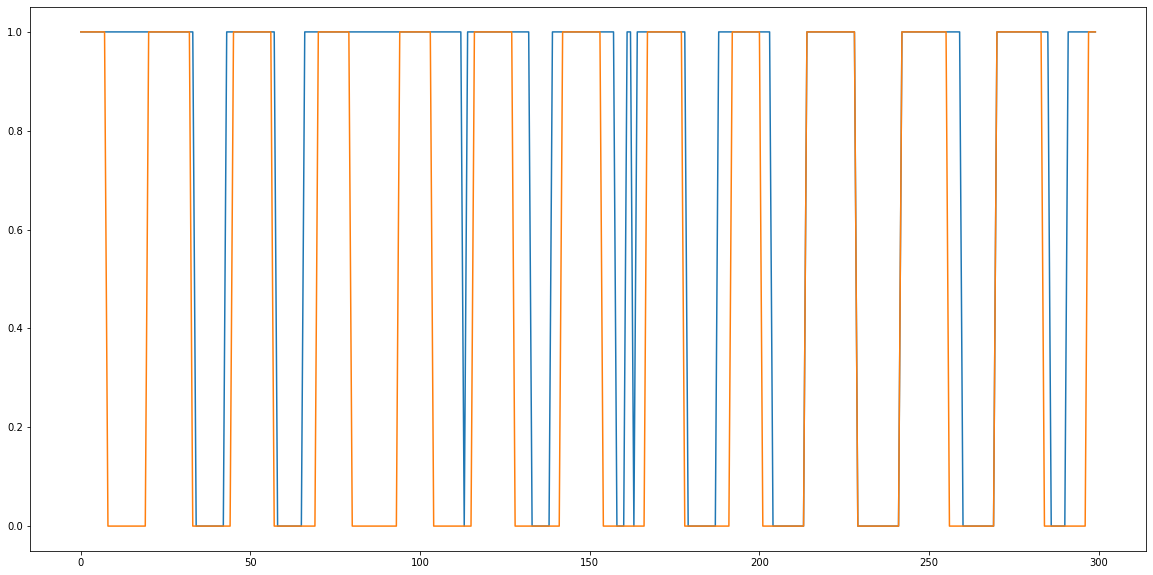

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
plt.plot(prediction[:300])
plt.plot(target_test[:300])

In [26]:
trg = pd.DataFrame()
trg ["else"]=target.reshape([-1])==False
trg ["heart_beat"]=target.reshape([-1])==True
np.array(trg )

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
trnx, testx, trny, testy = train_test_split(feat,trg, test_size=0.2)

 # Train multi class classification model and save it to the working directory
model = OneVsRestClassifier(LogisticRegression())
model.fit(trnx, trny)
print(classification_report(testy, model.predict(testx)))
joblib.dump(model, "../models/model.joblib")


In [ ]:
model_NN.fit(feat, trg, batch_size=50,  epochs=300)

In [ ]:
joblib.dump(model_NN,'../models/nn.joblib')

In [23]:
os.listdir('../models')

['nn.h5']